In [2]:
#%pip install -r requirements.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, KFold
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import (
    LinearRegression,
)
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error



In [4]:
df = pd.read_csv("./datasets/data1.csv", sep=",")

In [5]:
df.head()

,x1,x2,x3,y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [6]:
def data_prepare(df_X, df_y):
    min_max_scaler = preprocessing.StandardScaler()
    
    X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)
    
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.fit_transform(X_test)

    Y_train = min_max_scaler.fit_transform(Y_train)
    Y_test = min_max_scaler.fit_transform(Y_test)

    return (X_train, X_test, Y_train, Y_test)

In [7]:
X_train, X_test, y_train, y_test = data_prepare(df[["x3"]], df[["y"]])
X_train.shape, y_train.shape

y = pd.DataFrame(np.append(y_train, y_test))
y.describe()

,0
count,1.000000e+02
mean,6.661338e-18
std,1.005038e+00
min,-2.399154e+00
25%,-5.352350e-01
50%,4.019051e-01
75%,7.607433e-01
max,1.297013e+00


In [8]:
def 𝜙(x, 𝜇, 𝜎):
    return np.exp((-((x-𝜇)**2))/(2*𝜎**2))

def transform(dataframe: pd.DataFrame, n) -> pd.DataFrame:
    𝜇 = np.linspace(-1, 1, n)
    𝜎 = 2 / (n - 1)
    
    x = dataframe.to_numpy()
    i, j = x.shape
    
    x = x.reshape(i, 1, j)
    𝜇 = 𝜇.reshape(1, n, 1)
    

    x = 𝜙 (x, 𝜇, 𝜎)
    x = x.reshape(i, j * n)
    return pd.DataFrame(x, columns=[[f'x{k}' for k in range(j * n)]])

data_task3 = df.drop('y',axis=1)
data_task3 = transform(data_task3, 2)

data_task3.head()
for i in range(0, 6):
    df["x"+ str(i+4)] = data_task3["x"+ str(i)]

In [9]:
df.head()

,x1,x2,x3,y,x4,x5,x6,x7,x8,x9
0,0.000000,3.440000,0.440000,4.387545,0.882497,0.085077,0.771669,0.882497,0.475114,0.961558
1,0.040404,0.134949,0.888485,2.679650,0.873449,0.851280,0.640314,0.891274,0.910702,0.998447
2,0.080808,0.829899,1.336970,2.968490,0.864142,0.657990,0.505262,0.899772,0.996390,0.985907
3,0.121212,1.524848,1.785455,3.254065,0.854585,0.450743,0.379142,0.907979,0.966153,0.925781
4,0.161616,2.219798,2.233939,3.536375,0.844788,0.273655,0.270551,0.915888,0.830283,0.826690


# 1. За весь пункт 4 балла. Рассмотрим первый датасет. Пусть $x_i$ столбец данных, $y=x_4$
### a. Обучите линейную регрессию. Предскажите значения для $x=1,2,3$

In [10]:
plt.rcParams['figure.figsize'] = (16, 4)

Score 0 :  0.2787054010801457
Score 1 :  0.974466697209076
Score 2 :  1.0370445407002504
Score 3 :  0.2156043187577673
Score 4 :  0.01978643505487342


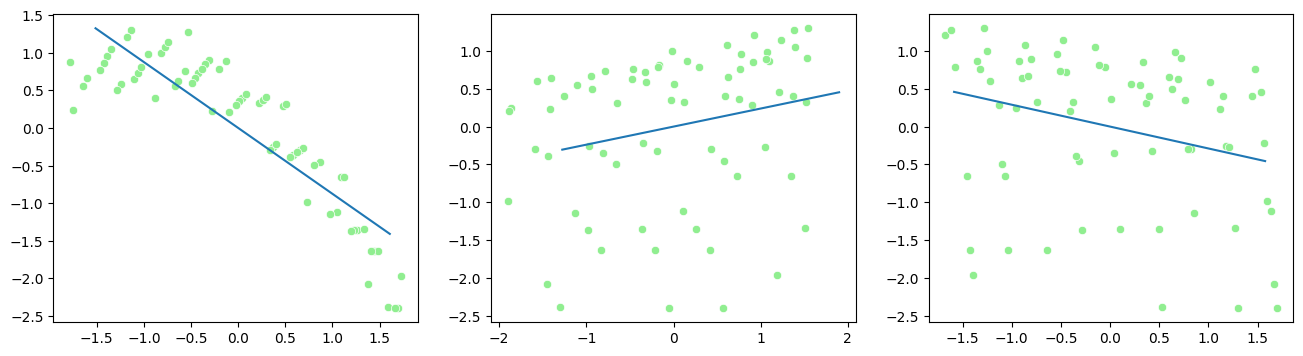

In [11]:
lm = LinearRegression()

features = [["x1"], ["x2"], ["x3"], ["x1", "x2", "x3"], ["x4", "x5", "x6", "x7", "x8", "x9"]]

fig, axs = plt.subplots(1, 3)
#fig.set_figwidth(16)

for i in range(len(features)):

    X_train, X_test, y_train, y_test = data_prepare(df[features[i]], df[["y"]])

    lm.fit(X_train, y_train)
    preds = lm.predict(X_test)
    print("Score", i,": ", mean_squared_error(preds, y_test))

    if (i >= 3):
        continue
    
    sns.scatterplot(ax=axs[i], x=X_train.reshape(-1), y=y_train.reshape(-1), color="lightgreen")
    sns.lineplot(ax=axs[i], x=X_test.reshape(-1), y=preds.reshape(-1))

### b. Используя кросс-валидацию и среднеквадратичную функцию потерь, оцените точность и способность к генерализации у модели

In [12]:
for i in range(len(features)):
    X_train, X_test, y_train, y_test = data_prepare(df[features[i]], df[["y"]])

    scoring = {'mse': make_scorer(mean_squared_error)}
    scores = cross_validate(lm, X_train, y_train, scoring=scoring, cv=5)
    
    print("Score", i,": ", scores["test_mse"])

Score 0 :  [0.28829621 0.29628598 0.13603564 0.28206285 0.27780812]
Score 1 :  [0.49002627 0.85157527 0.83471831 1.62055411 1.25392928]
Score 2 :  [0.67913447 0.93229082 0.97816473 1.47137972 1.12171778]
Score 3 :  [0.2129287  0.35522937 0.09542257 0.2773201  0.23391664]
Score 4 :  [0.01067986 0.01876068 0.00865731 0.03284229 0.01217376]


В зависимости от признака наблюдается разная среднеквадратическая ошибка, что связанно с разной дисперсией в данных, что наглядно видно по графикам. Модель неплохо обучилась на "x1", "x2" и "x3", хотя "x1" - нелинеен, "x2" и "x3" имеет выбросы, из-за которых страдает среднеквадратическая оценка.  

### c. Обучите полиномиальную регрессию, для кросс-валидации постройте график bias, variance в зависимости от степени полинома. Какая степень оптимальна?

In [13]:
def train_polynomial_regression(X, y, degree):
    X_train, X_test, y_train, y_test = data_prepare(X, y)

    # Добавление новых признаков:  [a, b] --(2)--> [1, a, b, a^2, ab, b^2].
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)    
    X_poly_test = poly_features.fit_transform(X_test)    
    
    #scoring = {'mse': make_scorer(mean_squared_error)}
    #scores = cross_validate(lm, X_poly_train, y_train, scoring=scoring, cv=5) #'mean_squared_error'
    #bias = np.mean(scores["test_mse"])
    #var = np.var(scores["test_mse"])

    mse, bias, var = bias_variance_decomp(
        lm, X_poly_train, y_train[:,0], X_poly_test, y_test[:,0], loss='mse', num_rounds=100 #, random_seed=25
    )

    return (bias,var)

In [14]:
My_array = np.arange(len(features)*8*2).reshape((len(features), 8, 2)).astype(np.float32)

for i in range(len(features)):
    for degree in [1, 2, 3, 4, 5, 6, 7, 8]:
        bias,var = train_polynomial_regression(df[features[i]], df[["y"]], degree=degree)

        My_array[i, degree-1, 0] = bias
        My_array[i, degree-1, 1] = var

In [15]:
My_arr2 = My_array.transpose(2, 0, 1)
biases = My_arr2[0]
vars = My_arr2[1]

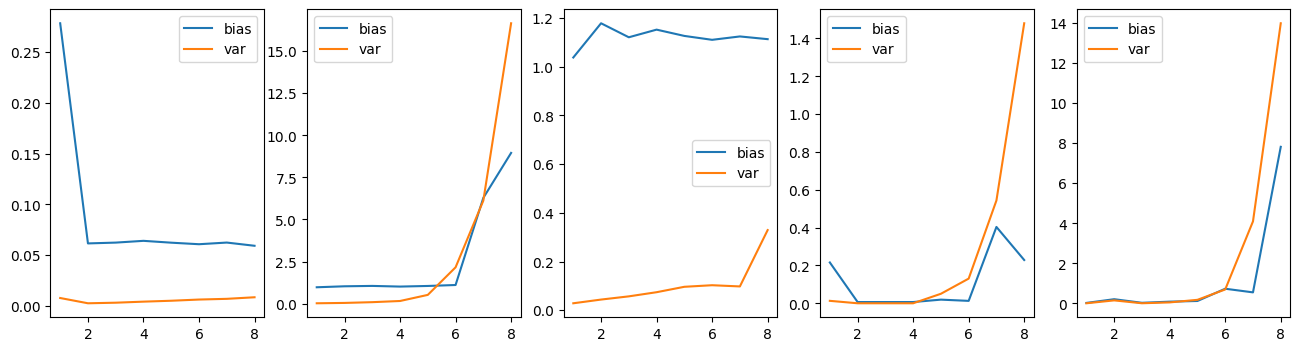

In [16]:
fig, axs = plt.subplots(1, len(features))


for i in range(len(features)):
    sns.lineplot(ax=axs[i],x=range(1, len(biases[i])+1), y=biases[i],label="bias")
    sns.lineplot(ax=axs[i],x=range(1, len(vars[i])+1), y=vars[i],label="var")
    plt.plot()


https://education.yandex.ru/handbook/ml/article/bias-variance-decomposition
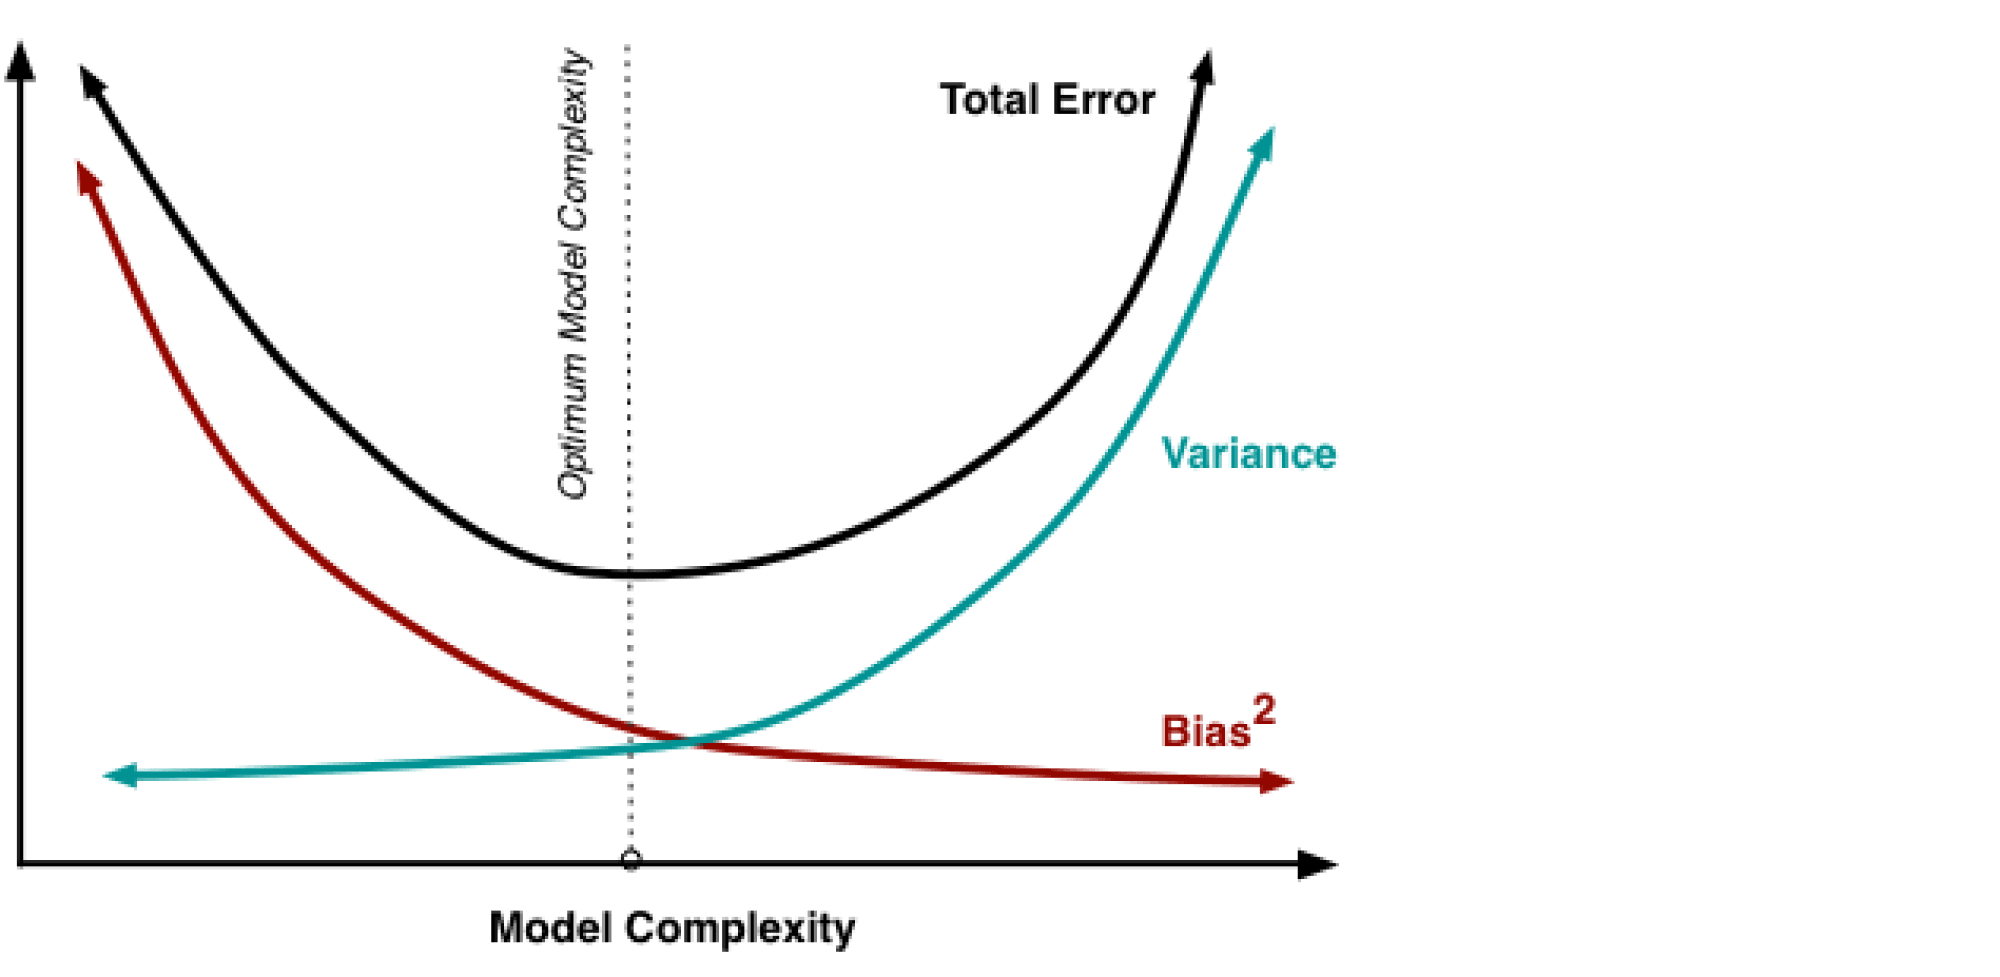

### d. Проведите подбор степени полинома с помощью любого из k-fold на 70% данных. Совпадают ли результаты? Оцените точность модели на оставшихся 30%.

In [17]:
for i in range(len(features)):
    X_train, X_test, y_train, y_test = data_prepare(df[features[i]], df[["y"]])

    kfld = KFold(n_splits=4)
    train_index, test_index = next(kfld.split(X_train, y_train))
    
    X_fold_train = X_train[train_index]
    y_fold_train = y_train[train_index]
    X_fold_test  = X_train[test_index]
    y_fold_test  = y_train[test_index]

    min_score = 9999
    best_degree = 0

    for degree_par in range(1, 5):
        X_poly_fold_train = PolynomialFeatures(degree_par).fit_transform(X_fold_train)
        X_poly_fold_test  = PolynomialFeatures(degree_par).fit_transform(X_fold_test)

        lm.fit(X_poly_fold_train, y_fold_train)
        lm_pred = lm.predict(X_poly_fold_test)
        score = mean_squared_error(lm_pred, y_fold_test)
        
        if score <= min_score:
            min_score = score
            best_degree = degree_par
    
    print("Best_degree: ", best_degree,  "; best_mse:", min_score)



Best_degree:  2 ; best_mse: 0.0771216949167465
Best_degree:  2 ; best_mse: 0.5291616535611715
Best_degree:  4 ; best_mse: 0.6992147023011446
Best_degree:  2 ; best_mse: 1.948013941082876e-30
Best_degree:  2 ; best_mse: 0.00036912418426045365


In [18]:
best_degree = [2, 2, 4, 3, 1]

for i in range(len(features)):
    X_train, X_test, y_train, y_test = data_prepare(df[features[i]], df[["y"]])

    kfld = KFold(n_splits=4)
    train_index, test_index = next(kfld.split(X_test, y_test))
    
    X_fold_train = X_train[train_index]
    y_fold_train = y_train[train_index]
    X_fold_test  = X_train[test_index]
    y_fold_test  = y_train[test_index]

    X_poly_fold_train = PolynomialFeatures(best_degree[i]).fit_transform(X_fold_train)
    X_poly_fold_test  = PolynomialFeatures(best_degree[i]).fit_transform(X_fold_test)

    lm.fit(X_poly_fold_train, y_fold_train)
    lm_pred = lm.predict(X_poly_fold_test)
    score = mean_squared_error(lm_pred, y_fold_test)

    lm.fit(X_poly_fold_train, y_fold_train)
    lm_pred = lm.predict(X_poly_fold_test)
    score = mean_squared_error(lm_pred, y_fold_test)
    
    print("Best_degree: ", best_degree[i],  "; best_mse:", score)

Best_degree:  2 ; best_mse: 0.051414515795019225
Best_degree:  2 ; best_mse: 0.7285992741449724
Best_degree:  4 ; best_mse: 1.0173784015134548
Best_degree:  3 ; best_mse: 1.4093955333025792e-30
Best_degree:  1 ; best_mse: 0.00931411480389661


# 4 Предположим, что 𝜖1 . . 𝜖𝑘 независимы и одинаково распределены в соответствии с распределением Лапласа (а не в соответствии с N(0,σ2)). То есть каждый $$𝜖_𝑖 ∼ 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0, 𝑏) = \frac{1}{2𝑏} e^{ − \frac {\mid 𝜖_𝑖 \mid}{b} }$$

### Приведите функцию потерь $𝐽_{𝐿𝑎𝑝𝑙𝑎𝑐𝑒(𝛽)}$, минимизация которой эквивалентна нахождению MLE для β в рамках вышеуказанной модели шума. Объясните эквивалентность. 1 балл



$$
LH( \theta \mid D  ) =  (\frac{\alpha}{2})^N e^{ -\alpha \sum_{i=1}^{N} \mid y^{(i)} - \theta^T x^{(i)} \mid}
$$
$$
ln(LH( \theta \mid D  )) = N ln(\frac{\alpha}{2}) - \alpha \sum_{i=1}^{N} \mid y^{(i)} - \theta^T x^{(i)} \mid
$$
$$
\hat{\theta} = argmin_{\theta} \mid y^{(i)} - \theta^T x^{(i)} \mid
$$

### b. Как вы думаете, почему приведенная выше модель обеспечивает более надежное соответствие данным по сравнению со стандартной моделью, предполагающей гауссово распределение шумовых членов? 1 балл

# 5

In [19]:
X_train, X_test, y_train, y_test = data_prepare(df[["x1", "x2", "x3"]], df[["y"]])


In [20]:
lm = LinearRegression()
score = 0.0
best_degree = 0
lm.fit(X_train, y_train)
lm_score = lm.score(X_test, y_test)
print(lm_score)

0.7843956812422326


In [60]:
lm = LinearRegression()
score = 0.0
best_degree = 0
for degree_par in range(1, 5):
    X_poly_train = PolynomialFeatures(degree_par).fit_transform(X_train)
    X_poly_test  = PolynomialFeatures(degree_par).fit_transform(X_test)

    lm.fit(X_poly_train, y_train)
    lm_score = lm.score(X_poly_test, y_test)

    if score < lm_score:
        score = lm_score

        best_degree = degree_par

In [61]:
print(score, best_degree)

0.9934524747471765 4


In [81]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

score = 0.0
best_degree = 0
lm2 = SGDRegressor(learning_rate='constant',  tol=.00000000000000001, eta0=.0001, loss='epsilon_insensitive', epsilon=0) 

for degree_par in range(1, 5):
    X_poly_train = PolynomialFeatures(degree_par).fit_transform(X_train)
    X_poly_test  = PolynomialFeatures(degree_par).fit_transform(X_test)

    lm2.fit(X_poly_train, y_train.ravel())
    
    lm_score = lm2.score(X_poly_test, y_test.ravel())
    if score < lm_score:
        score = lm_score

        best_degree = degree_par
print(score, best_degree)

0.9934697861609215 2


In [82]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

score = 0.0
best_degree = 0
lm2 = SGDRegressor(learning_rate='constant', tol=.00000000000000001, eta0=.0001, loss='squared_error') 

for degree_par in range(1, 3):
    X_poly_train = PolynomialFeatures(degree_par).fit_transform(X_train)
    X_poly_test  = PolynomialFeatures(degree_par).fit_transform(X_test)

    lm2.fit(X_poly_train, y_train.ravel())
    
    lm_score = lm2.score(X_poly_test, y_test.ravel())
    if score < lm_score:
        score = lm_score

        best_degree = degree_par
print(score, best_degree)

0.9900132260994069 2


/home/dima/Документы/Python/Першин_Никольская_Машинное_обучение/venv/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/dima/Документы/Python/Першин_Никольская_Машинное_обучение/venv/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Возможно дело в том что $MAE$ не так сильно штрафует за выбросы, т.к. функция ошибки линейная, в то время как $MSE$ довольно сильно штрафует выбивающиеся значения